In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
numOCW = 7
numOBW = 280
numGrids = 8
seq_length = 31
startLimit = 500
totalSlots = numOCW * numOBW * (startLimit + seq_length)

# same data in data.csv
nodes = [1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4, 1e5, 2e5, 3e5, 5e5, 1e6]

data = [[469.3, 512.33, 509.8, 491.86, 479.06, 480.36],
        [1853.8, 2004.2, 2001.83, 1886.63, 1870.63, 1831.6],
        [4078.6, 4404.83, 4433.0, 4133.63, 4080.8, 4061.7],
        [10828.63, 11744.3, 11737.6, 11027.03, 10889.26, 10826.66],
        [39086.76, 41934.03, 42008.13, 39839.6, 39417.96, 39079.8],
        [128077.86, 135044.56, 134875.4, 129942.66, 128697.7, 127994.4],
        [237286.86, 246030.43, 246059.76, 239691.6, 238085.46, 237321.36],
        [455510.7, 458667.1, 458703.56, 456414.33, 456407.26, 455778.66],
        [809614.36, 775092.0, 775008.46, 801120.83, 808255.53, 810514.56],
        [990200.33, 913025.53, 912983.8, 971996.86, 983417.36, 990564.7],
        [1014294.2, 929860.9, 929815.96, 993041.06, 1004787.3, 1014322.66],
        [1025271.46, 938680.56, 938723.9, 998990.2, 1013750.26, 1025353.26],
        [1032971.7, 945122.56, 945128.8, 999846.23, 1019372.0, 1032952.06]
        ]

data = np.array(data)

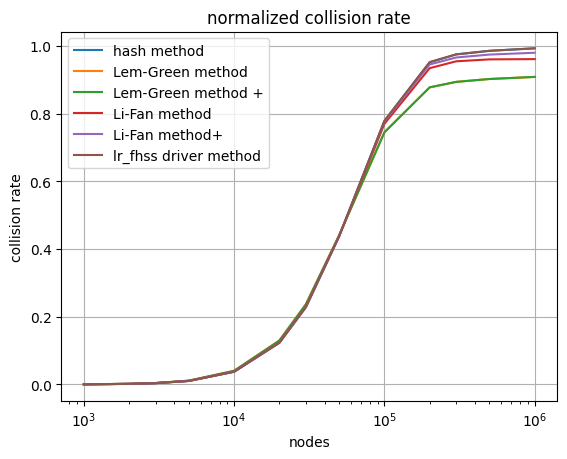

In [51]:
plt.plot(nodes, data[:,0]/totalSlots, label='hash method')
plt.plot(nodes, data[:,1]/totalSlots, label='Lem-Green method')
plt.plot(nodes, data[:,2]/totalSlots, label='Lem-Green method +')
plt.plot(nodes, data[:,3]/totalSlots, label='Li-Fan method')
plt.plot(nodes, data[:,4]/totalSlots, label='Li-Fan method+')
plt.plot(nodes, data[:,5]/totalSlots, label='lr_fhss driver method')
plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

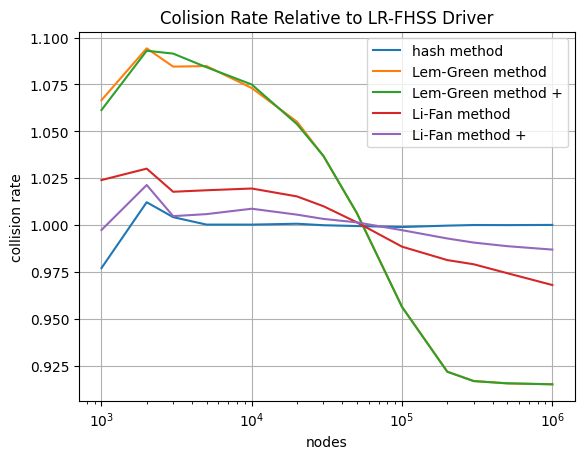

In [52]:
data2 = np.copy(data)
for i in range(data2.shape[0]):
    data2[i] = data2[i] / data2[i, -1]

plt.plot(nodes, data2[:,0], label='hash method')
plt.plot(nodes, data2[:,1], label='Lem-Green method')
plt.plot(nodes, data2[:,2], label='Lem-Green method +')
plt.plot(nodes, data2[:,3], label='Li-Fan method')
plt.plot(nodes, data2[:,4], label='Li-Fan method +')
#plt.plot(nodes, data2[:,-1], label='lr_fhss')
plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()